This notebooks summarize the main functions used for training the gnn and a few evaluation. 

# Graph Generator

## Random Generators

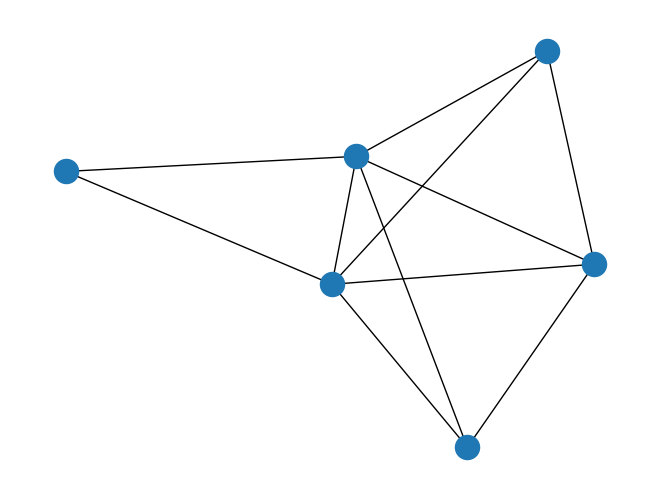

In [75]:
import data.random_graph_generator as rgg 
import networkx as nx
import matplotlib.pyplot as plt

#For the test, let's take a possible range of sizes of graphs 
sizes = range(3,11)

#Erdos-Renyi model generator
ergen = rgg.ERGenerator(sizes) #Let's use alpha = 1.3 the default value
G = ergen.generate()
nx.draw(G)
plt.draw()

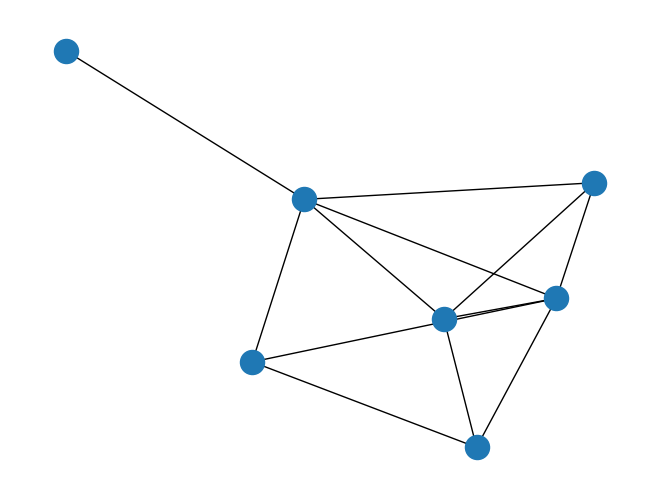

In [77]:
#Barabasi Albert model generator
bagen = rgg.BAGenerator(sizes)
G = bagen.generate()
nx.draw(G)

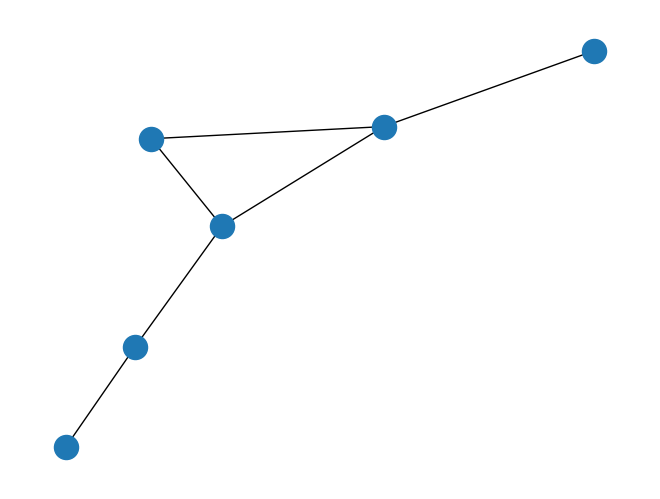

In [78]:
#Watt-Strogatz generator
wsgen = rgg.WSGenerator(sizes)
G = wsgen.generate()
nx.draw(G)

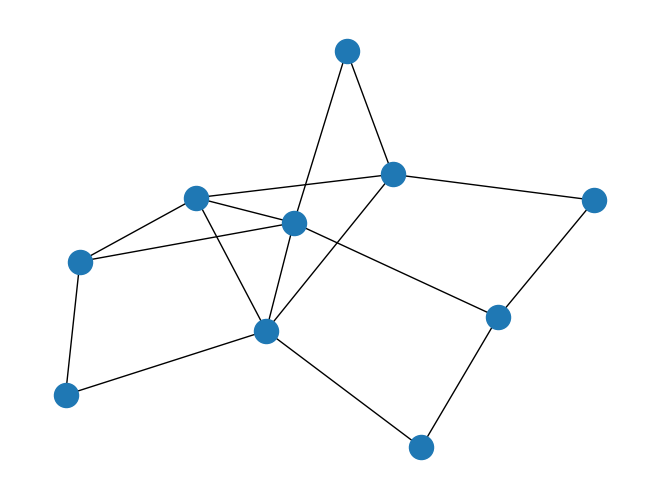

In [79]:
#Power-Law cluster generator
plcgen = rgg.PLCGenerator(sizes) #max_triangle_prob: float = 0.5
G = plcgen.generate()
nx.draw(G)

In [80]:
# Random Generator, choose one of the above generator with uniform chances. 
gen_list = [ergen,wsgen,bagen,plcgen]
rdgen = rgg.RandomGenerator(sizes)

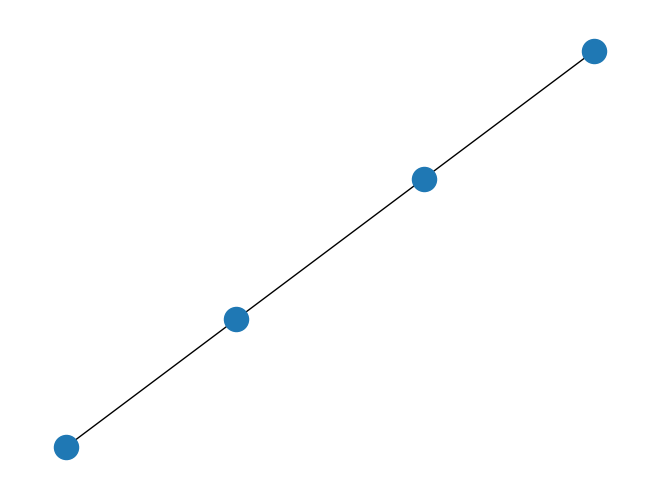

In [81]:
nx.draw(rdgen.generate())

## Generating from real (TU) Dataset

In [59]:
# Real generators, here an example with enzymes dataset
from data.real_graph_generator import RealGenerator
gen = RealGenerator("ENZYMES")

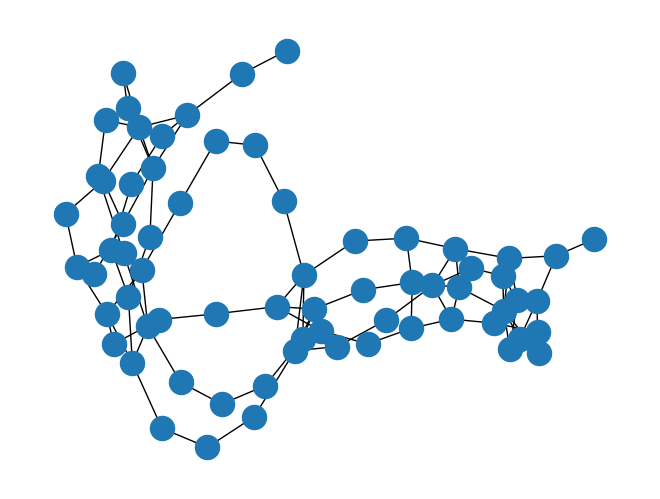

In [60]:
nx.draw(gen.generate())

# DataLoaders for On-The-Fly Data

Major technical limitations is the number of graphs used during the training. 
In Neuromatch, they must be generated on-the-fly and hence the workflow needs a few modification. 

### OTFContainer

Testing OTF containers. 
They are object considered as containers (the length is defined when declared) by Python and hence can be used like it. However they just infinitely generates items. 

In [61]:
from data.loaders import OTFContainer
import data.random_graph_generator as rgg
# Defining the parameters 
sizes = range(3,11)
epoch_size = 2
batch_size = 64

generator = rgg.RandomGenerator(sizes)
dataset_length = (batch_size//2) * epoch_size 
OTF_ds = OTFContainer(generator,dataset_length)

In [62]:
for g in OTF_ds :
    print(g)
    break

Data(edge_index=[2, 16], num_nodes=6)


In [63]:
len(OTF_ds)

64

In [64]:
OTF_ds[2]

Data(edge_index=[2, 6], num_nodes=3)

In [65]:
# Testing how to use them with torch_geometric Dataloaders
from torch_geometric.loader import DataLoader
single_loader_batch_size = batch_size//2
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)

In [66]:
len(otf_dl)

2

In [67]:
for k in otf_dl :
    print(k)

DataBatch(edge_index=[2, 610], num_nodes=197, batch=[197], ptr=[33])
DataBatch(edge_index=[2, 698], num_nodes=206, batch=[206], ptr=[33])


In [71]:
otf_dl = DataLoader(OTF_ds, batch_size=single_loader_batch_size)
for i,b in enumerate(otf_dl) : 
    print(f"batch {i} : {b} \nlen : {len(b)}")


batch 0 : DataBatch(edge_index=[2, 594], num_nodes=226, batch=[226], ptr=[33]) 
len : 32
batch 1 : DataBatch(edge_index=[2, 560], num_nodes=190, batch=[190], ptr=[33]) 
len : 32


### Dataloader

In [90]:
#Here we test the dataloaders gen function 
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
gen = random_generator(list(range(3,10)))
#Here we generate loaders containing 10 mini-batchs of 64 graphs each
loaders = gen_data_loaders(10,64,generator=gen)

for i in loaders:
    print(i)


[None, None, None, None, None, None, None, None, None, None]


In [91]:
n = 1
for batch_target, batch_neg_target, batch_neg_query in zip(*loaders):
    print(f"cycle : {n}")
    n+=1
    print(f"Printing loader length : {len(loaders[0])}")
    
    print("batch_target : ")
    print(batch_target)
    
    print("batch_neg_target : ")
    print(batch_neg_target)

    # The batch neg query is only used as a security to avoid infinite loop on the dataloader
    print("batch_neg_query : ")
    print(batch_neg_query)

print("end")

cycle : 1
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 574], num_nodes=190, batch=[190], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 524], num_nodes=192, batch=[192], ptr=[33])
batch_neg_query : 
None
cycle : 2
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 454], num_nodes=182, batch=[182], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 554], num_nodes=193, batch=[193], ptr=[33])
batch_neg_query : 
None
cycle : 3
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 604], num_nodes=193, batch=[193], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 542], num_nodes=183, batch=[183], ptr=[33])
batch_neg_query : 
None
cycle : 4
Printing loader length : 10
batch_target : 
DataBatch(edge_index=[2, 582], num_nodes=193, batch=[193], ptr=[33])
batch_neg_target : 
DataBatch(edge_index=[2, 482], num_nodes=178, batch=[178], ptr=[33])
batch_neg_query : 
None
cycle : 5
Printing loader length : 10
batch_target : 
Da

In [92]:
import networkx as nx
print(f"batch_target : {batch_target}\nlength : {len(batch_target)}\ntype : {type(batch_target)}") 
print(f"number of graphs : {batch_target.num_graphs}\nAs a list : \n{list(batch_target)}\nlist length : {len(list(batch_target))}")

batch_target : DataBatch(edge_index=[2, 456], num_nodes=190, batch=[190], ptr=[33])
length : 32
type : <class 'torch_geometric.data.batch.DataBatch'>
number of graphs : 32
As a list : 
[('edge_index', tensor([[  0,   0,   0,   1,   1,   2,   2,   2,   2,   3,   3,   3,   4,   4,
           4,   5,   5,   5,   6,   6,   7,   7,   8,   8,   8,   8,   9,   9,
           9,  10,  10,  10,  10,  11,  11,  11,  12,  12,  12,  12,  12,  12,
          12,  12,  13,  13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  15,
          15,  15,  15,  15,  16,  16,  16,  17,  17,  18,  18,  19,  20,  20,
          21,  21,  21,  21,  22,  22,  22,  23,  24,  24,  24,  25,  26,  27,
          28,  29,  30,  31,  31,  31,  32,  33,  34,  34,  35,  35,  36,  36,
          36,  37,  37,  37,  37,  38,  38,  38,  38,  38,  38,  38,  39,  39,
          39,  39,  39,  39,  40,  40,  40,  40,  40,  41,  41,  41,  42,  42,
          42,  43,  43,  43,  44,  44,  44,  44,  44,  44,  45,  45,  46,  47,
         

In [93]:
print(batch_target.get_example(0))

Data(edge_index=[2, 20], num_nodes=7)


## Batch handling

### Sample Subgraph on Batch

The first things to do when preparing batch is to sample the subgraph from our generated data. 

In [94]:
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data
gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 16], num_nodes=6)


In [95]:
import random
min_size = 5
d = 1
k = random.randint(min_size - d,g.num_nodes-1)
print(k) #Here we are just choosing a random k

4


In [96]:
from torch_geometric.utils import k_hop_subgraph
from torch_geometric.data import Data
start_node = random.choice(list(range(g.num_nodes))) # Choose the starting point of the walk
neighood =k_hop_subgraph(start_node,k,g.edge_index)
print(f"starting node : {start_node},\nk-neighborhood : {neighood}")
pyg_graph = Data(edge_index=neighood[1])
pyg_graph.num_nodes = len(neighood[0])

starting node : 4,
k-neighborhood : (tensor([0, 1, 2, 3, 4, 5]), tensor([[0, 0, 1, 1, 2, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5],
        [4, 5, 4, 5, 4, 4, 5, 0, 1, 2, 3, 5, 0, 1, 3, 4]]), tensor([4]), tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True]))


Nb : With this method, the full graph is sample. 

#### k_node_walk 

In [97]:
import networkx as nx
from data.batchs import k_nodes_walk
from torch_geometric.utils.convert import to_networkx
length = k

In [98]:
query_node = []
frontier = [start_node]
nx_graph = to_networkx(g,to_undirected=True)
for _ in range(length):                 #Random walk of `length` hops
    new_node = random.choice(frontier)                                  #Choosing a node among the neighbors of the graph
    query_node.append(new_node)                                         #Adding the new node to the walk
    frontier += list(nx_graph.neighbors(new_node))                      #Modifying the frontier of the new graph
    frontier = [node for node in frontier if node not in query_node]    #Deleting already encountered nodes

assert len(query_node) == len(set(query_node))
subgraph = nx_graph.subgraph(query_node)

#### Hards Negs Modification

They only randomly add between 0 and 5 edges to the initial graph to disturb it

Data(edge_index=[2, 16], num_nodes=6)
Graph with 6 nodes and 8 edges


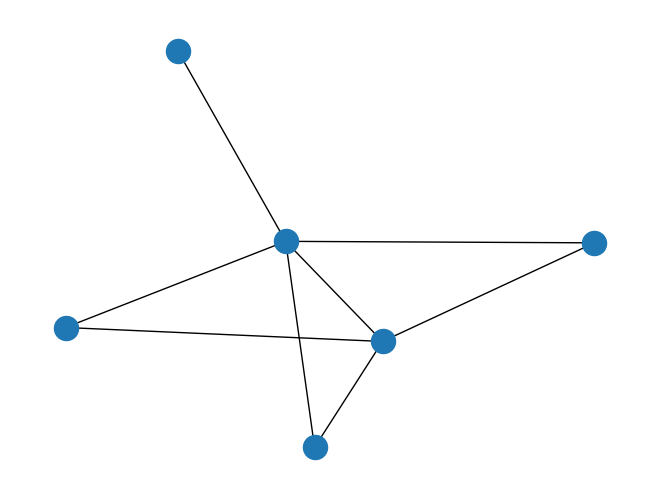

In [108]:
import networkx as nx
from torch_geometric.utils.convert import to_networkx
print(pyg_graph)
nx_ng = to_networkx(pyg_graph,to_undirected=True)
print(nx_ng)
nx.draw(nx_ng)
non_edges = list(nx.non_edges(nx_ng))

In [109]:
for u, v in random.sample(non_edges, random.randint(1, min(len(non_edges),5) )): #Adding up to a maximum of 5 edges more
    print(u,v) # Printing added edges
    nx_ng.add_edge(u,v)


1 2
1 3


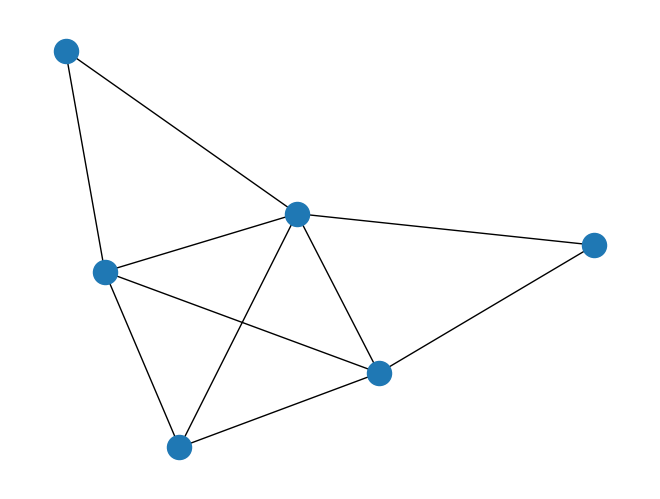

In [110]:
nx.draw(nx_ng)

#### Tagging the anchor

To creates the ID-GNN, A single one-hot vector must exists to tag the anchor. Here it is done during this step. 

#### Testing full version

In [ ]:
from data.batchs import sample_subgraph
import data.random_graph_generator as rgg
from utils.torch_ml import to_pyg_data

gen = rgg.random_generator(list(range(5,15)))
g = to_pyg_data(gen.generate())
print(g)

Data(edge_index=[2, 28], num_nodes=7)


In [ ]:
sample_subgraph(g,True)

(Data(edge_index=[2, 28], num_nodes=7, x=[7, 1]),
 Data(edge_index=[2, 14], num_nodes=5, x=[5, 1]))

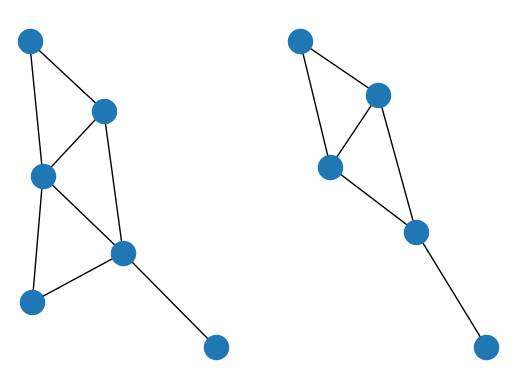

In [72]:
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import to_networkx
#Positive example 
target, query = sample_subgraph(g,True)
fig, axs = plt.subplots(1,2)
nx.draw(to_networkx(target,to_undirected=True),ax=axs[0])
nx.draw(to_networkx(query,to_undirected=True),ax=axs[1])
plt.draw()

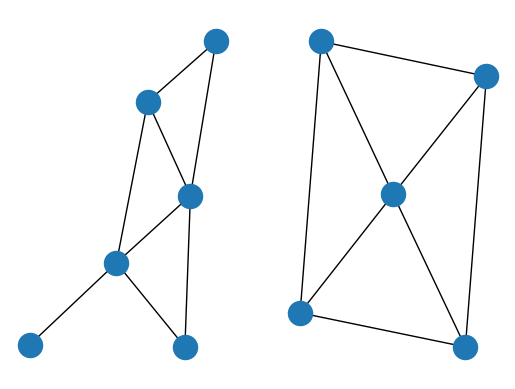

In [74]:
#Hard negative examples 
target, query = sample_subgraph(g,True,True)
fig, axs = plt.subplots(1,2)
nx.draw(to_networkx(target,to_undirected=True),ax=axs[0])
nx.draw(to_networkx(query,to_undirected=True),ax=axs[1])
plt.draw()


### Generating full batch 

In [ ]:
import random
import numpy as np
import networkx as nx

from torch_geometric.data import Batch
from data.random_graph_generator import random_generator
from data.loaders import gen_data_loaders
from utils.torch_ml import to_pyg_data

epoch_size = 10
gen = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(epoch_size,batch_size= 64,generator=gen)

print(loaders)

for batch_target, batch_neg_target, batch_neg_query in zip(*loaders): #Unzipping for test 
    break


neg_target = batch_neg_target

hard_neg_idxs = set(random.sample(range(neg_target.num_graphs),
            int(neg_target.num_graphs/2)))                          #That can be modify, int(...) is kept here to approach the original code approximation (even if num_graph//2 would be better)

batch_neg_query = Batch.from_data_list(
            [to_pyg_data(gen.generate(size=len(g))) if i not in hard_neg_idxs else g for i, g in enumerate(neg_target.to_data_list())])

#pos_a, pos_b, neg_a, neg_b = gen_batch(batch_target,batch_neg_target, batch_neg_query, True,generator=gen)

[<torch_geometric.loader.dataloader.DataLoader object at 0x17911ec10>, <torch_geometric.loader.dataloader.DataLoader object at 0x1791a57d0>, [None, None, None, None, None, None, None, None, None, None]]


In [ ]:
from data.batchs import augment_batch
#Testing the implemented function 
pos_a, pos_b, neg_a, neg_b = augment_batch(batch_target,batch_neg_target, gen)


In [ ]:
pos_a

DataBatch(edge_index=[2, 4308], num_nodes=546, x=[546, 1], batch=[546], ptr=[33])

In [ ]:
pos_b

DataBatch(edge_index=[2, 1708], num_nodes=305, x=[305, 1], batch=[305], ptr=[33])

In [ ]:
neg_a

DataBatch(edge_index=[2, 3658], num_nodes=541, x=[541, 1], batch=[541], ptr=[33])

In [ ]:
neg_b

DataBatch(edge_index=[2, 1334], num_nodes=226, x=[226, 1], batch=[226], ptr=[33])

# Testing the model

### Generating a dummy embedding

In [77]:
from models.NM import NeuroMatchNetwork
model = NeuroMatchNetwork()

In [78]:
#Generating a random graph
import data.random_graph_generator as rgg 
from utils.torch_ml import to_pyg_data
gen = rgg.RandomGenerator(list(range(5,15)))
graph = to_pyg_data(gen.generate())
graph


Data(edge_index=[2, 20], num_nodes=7)

In [79]:
import torch
graph_list = []
for k in range(2*64):
    graph = to_pyg_data(gen.generate())
    graph.x = torch.tensor([1.]*graph.num_nodes).unsqueeze(-1) #Adding a fake feature data (float type is important)
    graph_list.append(graph)
    
#graph_list

In [80]:
graph #the unsqueeze of graph.x is used to have the good size/dim. 

Data(edge_index=[2, 48], num_nodes=10, x=[10, 1])

In [81]:
from torch_geometric.loader import DataLoader
dl = DataLoader(graph_list,batch_size=32)
dl

In [82]:
batch_data = next(iter(dl))
batch_data

DataBatch(edge_index=[2, 1236], num_nodes=329, x=[329, 1], batch=[329], ptr=[33])

In [83]:
batch_data.x.dim()

2

In [84]:
emb = model.forward(batch_data)

In [85]:
print(emb.size())

torch.Size([32, 64])


In [86]:
emb 

tensor([[-0.4397,  0.4730, -0.7068,  ..., -0.1392,  0.2160,  2.6216],
        [ 0.0130,  0.0744,  0.1022,  ..., -0.0506, -0.1133,  0.1863],
        [-0.0052,  0.2120, -0.0897,  ..., -0.1465,  0.1353,  0.9249],
        ...,
        [ 0.0081,  0.0610,  0.0594,  ..., -0.0280, -0.0967,  0.0581],
        [-0.1803,  0.2520, -0.2743,  ..., -0.1142,  0.1325,  1.2270],
        [ 0.0708,  0.2428, -0.0287,  ..., -0.2140,  0.0798,  0.6765]],
       grad_fn=<AddmmBackward0>)

In [87]:
type(emb)

torch.Tensor

### Testing the loss function

Let's just do a dummy test set so we can compute a loss function and test it. 

In [88]:
pos_target = emb
temp = []
for batch in dl : 
    temp.append(model.forward(batch))


In [89]:
pos_query = temp[0]
neg_target = temp[1]
neg_query = temp[2]
neg_query

tensor([[ 8.5397e-03,  6.0715e-02,  6.7979e-02,  ..., -3.4730e-02,
         -1.0137e-01,  8.3789e-02],
        [ 3.9126e-01,  6.1297e-01, -2.0229e+00,  ..., -4.4461e-01,
          7.8252e-02,  7.9209e+00],
        [ 3.0028e-03,  2.6852e-01, -9.0827e-02,  ..., -1.8239e-01,
          1.6154e-01,  1.0907e+00],
        ...,
        [ 3.9581e-04,  5.4954e-02,  3.7801e-02,  ..., -3.4929e-02,
         -6.4429e-02,  4.3717e-02],
        [ 3.5391e-02,  9.8426e-02,  1.0746e-01,  ..., -7.8523e-02,
         -9.6364e-02,  2.5369e-01],
        [ 1.3084e+00,  8.0047e-01, -2.8959e+00,  ...,  1.8198e-01,
         -1.4508e+00,  1.6614e+01]], grad_fn=<AddmmBackward0>)

In [90]:
from models.NM import nm_criterion
loss = nm_criterion(pos_target,pos_query,neg_target,neg_query)
loss


tensor(0.0882, grad_fn=<AddBackward0>)

In [91]:
type(loss)

torch.Tensor

### Testing the prediction function

In [98]:
emb_targets = torch.cat((pos_target, neg_target), dim=0)
emb_subgraphs = torch.cat((pos_query, neg_query), dim=0)

In [99]:
emb_targets.shape

torch.Size([64, 64])

In [100]:
e = torch.sum(torch.max(torch.zeros_like(emb_targets,
        device=emb_targets.device), emb_subgraphs - emb_targets)**2, dim=1)

In [101]:
print(e.shape)
e

torch.Size([64])


tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.4826e+01, 3.4803e+02, 4.6479e+00, 1.0937e+01,
        4.7367e-01, 1.1844e-02, 4.9288e+00, 7.1534e+01, 7.8924e+01, 1.1278e+00,
        1.3038e+00, 1.3232e+00, 1.5080e+01, 5.1347e+02, 1.0152e-01, 1.0251e+02,
        6.2268e+00, 6.7515e+00, 1.6268e+02, 9.9132e-01, 1.1194e+00, 6.5264e+01,
        9.9877e+00, 9.6235e+02, 2.3407e-01, 2.1220e-01, 1.7511e-01, 1.6179e+02,
        1.2965e+02, 1.6267e-01, 6.9490e-01, 1.4854e+03],
       grad_fn=<SumBackward1>)

**NB** : We can see here that positive examples have a differences of 0. It's probably due to the fact that the query graph is exactly the same than the target graph. Hence, they have exactly the same embedding. 

In [102]:
e < 0.1

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [103]:
#We should have the same result with nm_predict 
from models.NM import treshold_predict
treshold_predict(emb_targets,emb_subgraphs)

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

# Training and Multiprocessing

## Example for a round of training

In [104]:
from data.loaders import gen_data_loaders
from data.random_graph_generator import random_generator
from models.NM import NeuroMatchNetwork
from data.batchs import augment_batch
import numpy as np
from models.NM import nm_criterion, treshold_predict
import torch 
import torch.nn as nn
from utils.torch_ml import get_device
generator = random_generator(np.arange(5 + 1, 29 + 1))
loaders = gen_data_loaders(generator=generator)


model = NeuroMatchNetwork()

lr=1e-4
weight_decay = 0.0

In [105]:
pos_batch, neg_batch, _ = next(zip(*loaders))
model.train()
model.zero_grad()
pos_target, pos_query, neg_target, neg_query = augment_batch(pos_batch,neg_batch,generator)


In [106]:
pos_target.num_graphs

32

In [108]:
#Creating the embedding 
emb_pos_tar = model(pos_target)
emb_pos_que = model(pos_query)
emb_neg_tar = model(neg_target)
emb_neg_que = model(neg_query)

In [109]:
# Computing a loss 
loss = nm_criterion(emb_pos_tar,emb_pos_que,emb_neg_tar,emb_neg_que)
loss.backward()

In [110]:
loss

tensor(58867196., grad_fn=<AddBackward0>)

In [111]:
emb_pos_tar 

tensor([[ 3.2511e-01, -1.8844e-02, -6.4742e-01,  ..., -1.6229e-02,
         -1.2602e-01, -9.9270e-02],
        [-1.5972e-01, -1.0939e+00, -4.4806e+00,  ...,  2.6120e-01,
         -9.5920e-01, -1.8247e+00],
        [ 4.0135e-01,  3.3152e-02, -5.4786e-01,  ..., -4.6180e-04,
         -2.4767e-01,  8.0564e-03],
        ...,
        [-3.2405e-01, -1.8026e+00, -6.4235e+00,  ...,  4.3226e-01,
         -1.4943e+00, -2.6032e+00],
        [ 5.9721e-01, -6.2953e+00, -9.5864e+00,  ...,  4.7614e+00,
         -3.9849e+00, -1.0013e+00],
        [ 4.5138e+02, -1.1989e+03, -3.8314e+03,  ..., -1.4148e+02,
         -1.2552e+02, -6.1153e+02]], grad_fn=<AddmmBackward0>)

In [112]:
emb_target = torch.cat((emb_pos_tar, emb_neg_tar), dim=0)
emb_query = torch.cat((emb_pos_que, emb_neg_que), dim=0)
pred_treshold = treshold_predict(emb_target,emb_query) 
# Here there is two possibilities, either using a treshold, either learning it with a MLP
# The above function implements the naive treshold but the final version use a classification model. 
pred_treshold

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False,  True, False, False,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True, False,
        False, False, False, False])

## NeuroMatchPred Class Test 

In [117]:
from models.NM import NeuroMatchPred
from utils.torch_ml import get_device
import torch
predict = NeuroMatchPred()
emb_targets = torch.rand(64,64).to(get_device())
emb_querys = torch.rand(64,64).to(get_device())

Pretrain Prediction Model


In [118]:
predict.predict(emb_targets,emb_querys)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False])

In [119]:
# Let's just train a bit the prediction model
labels = torch.tensor([1]*32 + [0]*32).to(get_device())
predict.model.train()
for k in range(30000) : 
    pos = torch.rand(32,64).to(get_device()) #This method of generation of embedding is also use for the pre_training
    neg_tar = torch.rand(32,64).to(get_device())
    neg_que = torch.rand(32,64).to(get_device())
    shuf = torch.randperm(64)
    emb_targets = torch.cat((pos, neg_tar), dim=0)[shuf]
    emb_querys = torch.cat((pos, neg_que), dim=0)[shuf]
    pred , loss = predict.train(emb_targets,emb_querys,labels[shuf])
    pred = pred.argmax(dim=-1)
    acc = torch.mean((pred == labels[shuf]).type(torch.float)).item()
    print(f"loss : {loss}, k : {k}, acc : {acc}", end="                          \r")

In [121]:
#Expected results 
labels[shuf]

tensor([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [120]:
#Results
predict.predict(emb_targets,emb_querys)

tensor([False, False,  True, False,  True, False, False,  True,  True,  True,
        False,  True,  True, False,  True,  True, False,  True, False,  True,
        False,  True,  True,  True, False, False, False,  True, False, False,
         True,  True,  True, False, False, False,  True,  True, False, False,
         True,  True,  True, False, False, False,  True,  True,  True,  True,
         True, False,  True, False, False, False,  True, False, False, False,
        False,  True, False,  True])

## Testing the train() and train_loop() functions

In [ ]:
from train import train
import torch.multiprocessing as mp
import numpy as np 
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import data.random_graph_generator as rgg
mp.set_start_method("spawn",force=True)
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred()
emb_model.share_memory()
pred_model.model.share_memory()
generator = rgg.random_generator(np.arange(6,30))

Pretrain Prediction Model


In [ ]:
in_queue, out_queue = mp.Queue(), mp.Queue()
workers = []
worker = mp.Process(target=train, args=(emb_model,pred_model,generator,in_queue,out_queue))
worker.start()
print(f"Worker {0} PID : {worker.pid}")
workers.append(worker)

Worker 0 PID : 79409


In [ ]:
in_queue.put((1e-4,"step"))
_, (loss, acc, _) = out_queue.get()
print(f"loss : {loss:.4f}, acc : {acc:.4f}", end="           \r")
in_queue.put("done")
del loss, acc

In [ ]:
from train import train_loop
train_loop()

Pretrain Prediction Model
Generating testing batch : 64 / 64      
Worker 0 PID : 91108
Worker 1 PID : 91109
Worker 2 PID : 91110
Worker 3 PID : 91111
Worker 4 PID : 91112
Worker 5 PID : 91113
Training Evaluation : Epoch 0                                                                       
Embedding Metrics  : Max : 728259.4375, Mean : 601.609130859375, Standard Deviation : 17659.6484375, MSE : 623933760.0
Prediction Metrics : Accuracy : 0.6064453125, Precision : 0.6749598715890851, Recall : 0.41064453125
--------------------------------------------------
Training Evaluation : Epoch 1                                                                       
Embedding Metrics  : Max : 114196.75, Mean : 96.89732360839844, Standard Deviation : 1955.9727783203125, MSE : 7548957.0
Prediction Metrics : Accuracy : 0.63720703125, Precision : 0.6549062844542448, Recall : 0.580078125
--------------------------------------------------
Training Evaluation : Epoch 2                                 

KeyboardInterrupt: 

# Evaluation of the model 

## Generating Evaluation batches

In [123]:
#Testing the function that generates the batchs for evaluation. 
from evalutation import generating_evaluation_batchs
batchs_list = generating_evaluation_batchs()
print(batchs_list[0])
len(batchs_list[0][0])

Generating testing batch : 64 / 64      
(DataBatch(edge_index=[2, 3508], num_nodes=527, x=[527, 1], batch=[527], ptr=[33]), DataBatch(edge_index=[2, 1520], num_nodes=295, x=[295, 1], batch=[295], ptr=[33]), DataBatch(edge_index=[2, 3420], num_nodes=590, x=[590, 1], batch=[590], ptr=[33]), DataBatch(edge_index=[2, 722], num_nodes=180, x=[180, 1], batch=[180], ptr=[33]))


32

## Function for testing 

It's really similar to the train function. 

In [125]:
from models.NM import NeuroMatchNetwork, NeuroMatchPred

emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred()

Pretrain Prediction Model


In [126]:
#list
from evalutation import evaluation_predict
pred, labels, e_score = evaluation_predict(emb_model,pred_model,batchs_list)
print(len(pred))

4096                                                                                                 


In [127]:
pred[:10] == labels[:10]

tensor([False, False, False, False, False,  True, False, False, False, False])

In [ ]:
print(pred[:10])
print(labels[:10])

tensor([False, False, False, False, False, False, False, False,  True, False])
tensor([True, True, True, True, True, True, True, True, True, True])


In [128]:
import torch
acc = torch.mean((pred == labels).type(torch.float)).item()
prec = (torch.sum(pred * labels).item() / torch.sum(pred).item() if
        torch.sum(pred) > 0 else float("NaN"))                              #Precision over the full batch 
recall = (torch.sum(pred * labels).item() /
        torch.sum(labels).item() if torch.sum(labels) > 0 else
        float("NaN"))                                                       #Recall over the full batch 

In [129]:
print(acc)
print(prec)
print(recall)

0.5205078125
0.5711864406779661
0.16455078125


## A few metrics (used in TensorBoard)

In [130]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix

auroc = roc_auc_score(labels, pred)                                 #sklearn.metrics.roc_auc_score 
avg_prec = average_precision_score(labels, pred)                    #sklearn.metrics.average_precision_score
tn, fp, fn, tp = confusion_matrix(labels, pred).ravel()                 #sklearn.metrics.confusion_matrix TrueNeg, FalsePos, FalseNeg, TruePos

In [131]:
print(auroc)
print(avg_prec)
print(f"TN : {tn} FN : {fn} TP : {tp} TN : {tn}")

0.5205078125
0.5117137844279661
TN : 1795 FN : 1711 TP : 337 TN : 1795


In [132]:
max_loss = torch.max(e_score)
mean_loss = torch.mean(e_score)

In [133]:
torch.median(e_score)

tensor(31.8794)

In [134]:
torch.std(e_score) # Standard deviation 

tensor(5669724.5000)

In [135]:
from sklearn.metrics import mean_squared_error
mean_squared_error(e_score[labels],torch.zeros_like(e_score[labels]))


46559510000000.0

# Precision recall curves as in neuromatch git

In [ ]:
import torch
from models.NM import NeuroMatchNetwork, NeuroMatchPred
from evalutation import nm_pr_curve, generating_evaluation_batchs
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)

In [58]:
print("The following cells shouldn't be runned") 
assert False

The following cells shouldn't be runned


AssertionError: 

Generating testing batch : 64 / 64      
Prediction Metrics : Accuracy : 0.851318359375, Precision : 0.7740952380952381, Recall : 0.9921875   
Saved PR curve plot in plots/precision-recall-curve.png


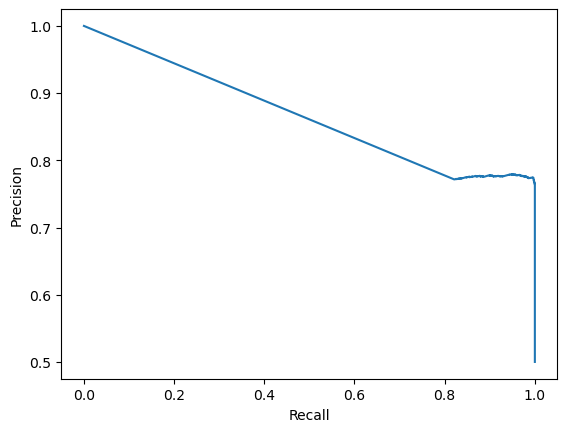

In [ ]:
# Run Jun17-16-24 
# Scheduler over every worker (handle by parent process) minimum lr = 1e-9 and starting lr reduced to 5e-5
from evalutation import nm_pr_curve, generating_evaluation_batchs
batchs_list = generating_evaluation_batchs()
nm_pr_curve(emb_model,pred_model,batchs_list)

Generating testing batch : 64 / 64      
Prediction Metrics : Accuracy : 0.564208984375, Precision : 0.5343073310722671, Recall : 1.0         
Saved PR curve plot in plots/precision-recall-curve.png


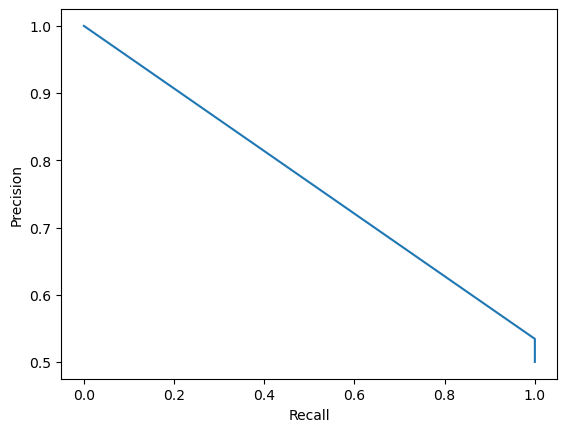

In [ ]:
# Run Jun17-19-44 with corrected error. scheduler working (min_lr = 1e-12), and starting lr = 1e-5
emb_model.load_state_dict(torch.load("ckpt/emb_model_29_Jun-17-19-44.pt"))
pred_model.model.load_state_dict(torch.load("ckpt/pred_model_linear_29_Jun17-19-44.pt"))
batchs_list = generating_evaluation_batchs()
nm_pr_curve(emb_model,pred_model,batchs_list)

Generating testing batch : 64 / 64      
Prediction Metrics : Accuracy : 0.706298828125, Precision : 0.6310890474713, Recall : 0.9931640625   
Saved PR curve plot in plots/precision-recall-curve.png


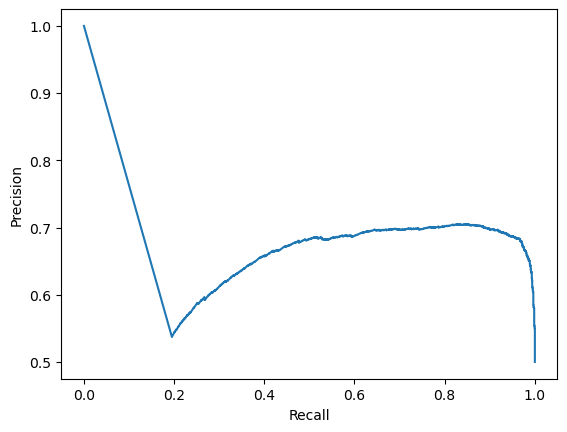

In [ ]:
emb_model.load_state_dict(torch.load("ckpt/emb_model_29.pt"))
pred_model.model.load_state_dict(torch.load("ckpt/pred_model_linear_29.pt"))
batchs_list = generating_evaluation_batchs()
nm_pr_curve(emb_model,pred_model,batchs_list)

Generating testing batch : 64 / 64      
Prediction Metrics : Accuracy : 0.805419921875, Precision : 0.719859402460457, Recall : 1.0          
Saved PR curve plot in plots/precision-recall-curve.png


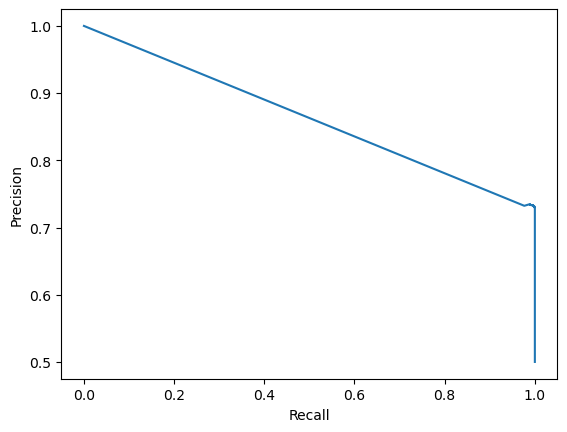

In [ ]:
emb_model.load_state_dict(torch.load("ckpt/emb_model_9_Jun18-11-53.pt"))
pred_model.model.load_state_dict(torch.load("ckpt/pred_model_linear_9_Jun18-11-53.pt"))
batchs_list = generating_evaluation_batchs()
nm_pr_curve(emb_model,pred_model,batchs_list)

# Model test over multiple dataset

Here the `verif_test` function return three tests results : 
- 1st test is a only positive example batch. 
- 2nd test is about *simple negative*. A full batch of target is associated with random queries. The prediction should (almost) always be negative. 
- 3rd test is about *hard negative*. For every target, a query is built upon by adding edges. 

In [146]:
from evalutation import verif_test
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import torch
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)
emb_model.load_state_dict(torch.load("saved_models/neuromatch_9_Jun18_11_53.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/neuromatch_pred_9_Jun18_11_53.pt"))

verif_test(emb_model,pred_model)

(tensor(0.9894), tensor(0.5478), tensor(0.2996))

Here over the Enzyme Dataset, the Neuromatch model is : 
- Always right on positive cases 
- Right only half the time on "simple negatives" 
- Almost never right on "hard negatives" 

In [ ]:
verif_test(emb_model,pred_model,"synthetic_large")

(tensor(1.), tensor(0.3353), tensor(0.3200))

In [ ]:
verif_test(emb_model,pred_model,"synthetic_little")

(tensor(1.), tensor(0.2889), tensor(0.3450))

In [ ]:
(0.9947 + 0.5196+ 0.2637)/3

0.5926666666666667

In [151]:
emb_model.load_state_dict(torch.load("saved_models/neuromatch_scheduler_29_Jun17_19_44.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/neuromatch_scheduler_pred_29_Jun17_19_44.pt"))

verif_test(emb_model,pred_model) #Test for enzymes 

(tensor(1.), tensor(0.5265), tensor(0.1973))

In [152]:
verif_test(emb_model,pred_model,"synthetic_large")

(tensor(1.), tensor(0.3255), tensor(0.3092))

In [154]:
verif_test(emb_model,pred_model,"synthetic_little")

(tensor(0.9850), tensor(0.3593), tensor(0.3536))

In [153]:
emb_model.load_state_dict(torch.load("saved_models/faulty_loss_34_Jun21_14_02.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_loss_pred_34_Jun21_14_02.pt"))

verif_test(emb_model,pred_model)

(tensor(0.4088), tensor(0.6593), tensor(0.5462))

For the "Faulty loss" model the results are more smooth between each test. 
For every test (which are *Full positive, Full easy negatives, Full hard negatives*) the model is right half the time. 

In [ ]:
verif_test(emb_model,pred_model,"synthetic_large")

(tensor(0.6870), tensor(0.4671), tensor(0.4483))

In [ ]:
verif_test(emb_model,pred_model,"synthetic_little")

(tensor(0.9850), tensor(0.3642), tensor(0.3608))

# Dataset

Just a few tests on the implementation of a dataset object for synthetic data

In [ ]:
from data.dataset import SyntheticDataset
ds = SyntheticDataset(root = "../Testds/SYNTHETIC")

Downloading...
Done


Processing...
Done!


In [ ]:
nodes = []
for g in ds : 
    nodes.append(g.num_nodes)

In [ ]:
import numpy as np
np.mean(nodes)

83.869

In [ ]:
from data.dataset import SyntheticDataset
import numpy as np
ds = SyntheticDataset(root = "../Testds/SYNTHETIC_LITTLE",graph_sizes=np.arange(6,30))

# AUROC

Auroc scores for multiples dataset and trainings.

## Enzyme

### batch generation

In [ ]:
from evalutation import dataset_choice
from data.batchs import sample_subgraph
import torch_geometric.utils as pyg_utils
import networkx as nx

ds, generator = dataset_choice("enzyme")
target, query = [], []

for graph in ds:
    if graph.num_nodes < 6 or not nx.is_connected(pyg_utils.to_networkx(graph,to_undirected=True)) :
        # Not dealing with too little graph and unconnected.
        continue
    g_tar, g_quer = sample_subgraph(graph,False)
    target.append(g_tar)
    query.append(g_quer)

n = len(target)

In [ ]:
print(f"number of graphs sampled : {n}")

number of graphs sampled : 565


In [ ]:
from utils.torch_ml import to_pyg_data
from data.batchs import gen_anchor_feature
import random
random_query = []
for k in range(n) :
    g = to_pyg_data(generator.generate(query[k].num_nodes))
    g.x = gen_anchor_feature(g,random.randint(0,g.num_nodes))
    random_query.append(g)

In [ ]:
import torch_geometric.data as pyg_data
pos_query = pyg_data.Batch.from_data_list(query)
pos_target = pyg_data.Batch.from_data_list(target)
neg_query = pyg_data.Batch.from_data_list(random_query)
neg_target = pyg_data.Batch.from_data_list(target)

### tests

In [155]:
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import torch
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)
#Loading Neuromatch model
emb_model.load_state_dict(torch.load("saved_models/neuromatch_9_Jun18_11_53.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/neuromatch_pred_9_Jun18_11_53.pt"))

<All keys matched successfully>

In [ ]:
emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
# The total testing tensor is of size 2n and half positive half negative example


In [ ]:
from sklearn.metrics import roc_auc_score
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    

In [ ]:
print(f"The AUROC score is : {score}")

The AUROC score is : 0.7654867256637168


In [ ]:
# Let's try another model to see how it's doing 
emb_model.load_state_dict(torch.load("saved_models/faulty_loss_34_Jun21_14_02.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_loss_pred_34_Jun21_14_02.pt"))
# I chose the lastest faulty loss result (that I have the detailed result on each three test)
emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.5504424778761061


In [ ]:
# Model trained on Enzyme 
emb_model.load_state_dict(torch.load("saved_models/enzymes_9_Jul09_13_25.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/enzymes_pred_9_Jul09_13_25.pt"))

emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.7672566371681416


In [ ]:
# Model trained on Enzyme with misimplemented loss
emb_model.load_state_dict(torch.load("saved_models/faulty_enzymes_14_Jul09_14_32.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_enzymes_pred_14_Jul09_14_32.pt"))

emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.768141592920354


## Cox2

### batch generation

In [25]:
from evalutation import dataset_choice
from data.batchs import sample_subgraph
import torch_geometric.utils as pyg_utils
import networkx as nx

ds, generator = dataset_choice("cox2")
target, query = [], []

for graph in ds:
    if graph.num_nodes < 6 or not nx.is_connected(pyg_utils.to_networkx(graph,to_undirected=True)) :
        # Not dealing with too little graph and unconnected.
        continue
    g_tar, g_quer = sample_subgraph(graph,False)
    target.append(g_tar)
    query.append(g_quer)

n = len(target)

In [26]:
print(f"number of graphs sampled : {n}")

number of graphs sampled : 467


In [27]:
from utils.torch_ml import to_pyg_data
from data.batchs import gen_anchor_feature
import random
random_query = []
for k in range(n) :
    g = to_pyg_data(generator.generate(query[k].num_nodes))
    g.x = gen_anchor_feature(g,random.randint(0,g.num_nodes))
    random_query.append(g)

In [28]:
import torch_geometric.data as pyg_data
pos_query = pyg_data.Batch.from_data_list(query)
pos_target = pyg_data.Batch.from_data_list(target)
neg_query = pyg_data.Batch.from_data_list(random_query)
neg_target = pyg_data.Batch.from_data_list(target)

### tests

In [29]:
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import torch
from sklearn.metrics import roc_auc_score
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)
#Loading Neuromatch model
emb_model.load_state_dict(torch.load("saved_models/neuromatch_9_Jun18_11_53.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/neuromatch_pred_9_Jun18_11_53.pt"))
emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.8715203426124197


In [30]:
print(f"number of false positive : {sum(pred[labels==0])} for {pred[labels==0].size()} results : {sum(pred[labels==0]).item() /1000 *100} % of FP") 

number of false positive : 120 for torch.Size([467]) results : 12.0 % of FP


In [31]:
# Let's try the faulty loss 
emb_model.load_state_dict(torch.load("saved_models/faulty_loss_34_Jun21_14_02.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_loss_pred_34_Jun21_14_02.pt"))

emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.7933618843683083


In [32]:
# Model trained on COX2
emb_model.load_state_dict(torch.load("saved_models/cox2_9_Jul08_23_39.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/cox2_pred_9_Jul08_23_39.pt"))

emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.8961456102783726


In [33]:
print(f"number of false positive : {sum(pred[labels==0])} for {pred[labels==0].size()} results : {sum(pred[labels==0]).item() /1000 *100} % of FP") 

number of false positive : 97 for torch.Size([467]) results : 9.700000000000001 % of FP


In [34]:
# Model trained on COX2 with a faulty loss
emb_model.load_state_dict(torch.load("saved_models/faulty_cox2_9_Jul09_10_15.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_cox2_pred_9_Jul09_10_15.pt"))

emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.9175588865096359


In [35]:
print(f"number of false positive : {sum(pred[labels==0])} for {pred[labels==0].size()} results : {sum(pred[labels==0]).item() /1000 *100} % of FP") 

number of false positive : 77 for torch.Size([467]) results : 7.7 % of FP


## Synthetic

### batch generation 

In [1]:
from evalutation import dataset_choice
from data.batchs import sample_subgraph
import torch_geometric.utils as pyg_utils
import networkx as nx

ds, generator = dataset_choice("synthetic_little")
target, query = [], []

for graph in ds:
    if graph.num_nodes < 6 or not nx.is_connected(pyg_utils.to_networkx(graph,to_undirected=True)) :
        # Not dealing with too little graph and unconnected.
        continue
    g_tar, g_quer = sample_subgraph(graph,False)
    target.append(g_tar)
    query.append(g_quer)

n = len(target)

In [2]:
print(f"number of graphs sampled : {n}")

number of graphs sampled : 1000


In [3]:
from utils.torch_ml import to_pyg_data
from data.batchs import gen_anchor_feature
import random
random_query = []
for k in range(n) :
    g = to_pyg_data(generator.generate(query[k].num_nodes))
    g.x = gen_anchor_feature(g,random.randint(0,g.num_nodes))
    random_query.append(g)

import torch_geometric.data as pyg_data
pos_query = pyg_data.Batch.from_data_list(query)
pos_target = pyg_data.Batch.from_data_list(target)
neg_query = pyg_data.Batch.from_data_list(random_query)
neg_target = pyg_data.Batch.from_data_list(target)

### tests 

In [6]:
from models.NM import NeuroMatchNetwork, NeuroMatchPred
import torch
from sklearn.metrics import roc_auc_score
emb_model = NeuroMatchNetwork()
pred_model = NeuroMatchPred(pretrain=False)
#Loading Neuromatch model
emb_model.load_state_dict(torch.load("saved_models/neuromatch_9_Jun18_11_53.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/neuromatch_pred_9_Jun18_11_53.pt"))
emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.636


In [21]:
print(f"number of false positive : {sum(pred[labels==0])} for {pred[labels==0].size()} results : {sum(pred[labels==0]).item() /1000 *100} % of FP") 

number of false positive : 728 for torch.Size([1000]) results : 72.8 % of FP


In [22]:
# Let's try the faulty loss model 
emb_model.load_state_dict(torch.load("saved_models/faulty_loss_34_Jun21_14_02.pt"))
pred_model.model.load_state_dict(torch.load("saved_models/faulty_loss_pred_34_Jun21_14_02.pt"))
emb_pos_target = emb_model(pos_target)
emb_pos_query = emb_model(pos_query)
emb_neg_target = emb_model(neg_target)
emb_neg_query = emb_model(neg_query)
emb_target = torch.cat((emb_pos_target, emb_neg_target), dim=0)
emb_query = torch.cat((emb_pos_query,emb_neg_query), dim=0)
labels = torch.tensor([1]*n + [0]*n)
pred = pred_model.predict(emb_target,emb_query)
score = roc_auc_score(labels, pred)    
print(f"The AUROC score is : {score}")

The AUROC score is : 0.6785


In [23]:
print(f"number of false positive : {sum(pred[labels==0])} for {pred[labels==0].size()} results : {sum(pred[labels==0]).item() /1000 *100} % of FP") 

number of false positive : 625 for torch.Size([1000]) results : 62.5 % of FP
